# 2. Pre-Processing

In [47]:
# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rc
import seaborn as sns

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set graph defaults
plt.rc('font', family='serif', size=10)
plt.rc('legend', fontsize=10)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['axes.unicode_minus'] = False

# Read in data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

# Read in data summary
data_summary = pd.read_csv("data_summary.csv", index_col=0)

### 2.1 Data Cleaning

In [48]:
# Identify rows with missing data
cols_missing = data_summary[data_summary["min"] == -9999.0].index.to_list()
rows_missing = []
for i in cols_missing:
    rows_missing = rows_missing + X_train[X_train[i] == -9999.0].index.to_list()

# Remove rows with missing data
X_train_clean = X_train.drop(rows_missing)

# Identify rows with data more than five standard deviations away from the mean
#cols_outlier = []
#rows_outlier = []
#for i in X_train.columns.to_list():
#    diff = abs(X_train_clean[i] - data_summary.loc[i]["mean"]) / data_summary.loc[i]["std"]
#    diff_rows = diff[diff > 10].index.to_list()
#    rows_outlier = rows_outlier + diff_rows
#    if len(diff_rows) > 0:
#        cols_outlier.append(i)

# Remove rows with outlier data
#X_train_clean = X_train_clean.drop(rows_outlier)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train_clean)
X_train_clean = pd.DataFrame(scaler.transform(X_train_clean))
X_train_clean.columns = X_train.columns

### 2.2 PCA Dimensionality Reduction

In [49]:
# Get principal components
K = 25
columns= ["PCA" + str(i + 1) for i in range(K)]
pca = PCA(n_components = K)
pca.fit(X_train_clean)

# Label principal components
V = pd.DataFrame(data=pca.components_.T,
                 columns=columns,
                 index=X_train_clean.columns)
print('Principal components:\n', V) 

# Calculate eigenvalues of the projections
lam = pca.explained_variance_
print('\n Eigenvalues/variance of the projections:\n', lam)

# Compute the projections onto the principal components
Z_pca = pca.transform(X_train_clean)
X_train_clean_pca = pd.DataFrame(Z_pca, columns=columns)

Principal components:
                    PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
ra            -0.004531 -0.036905  0.002115  0.007312  0.026620  0.010845   
dec           -0.015847 -0.208002 -0.004290  0.025724 -0.038644  0.044485   
rowv          -0.001135 -0.000004  0.004042 -0.014706 -0.002902 -0.001041   
colv          -0.000500 -0.001206 -0.003759  0.013056  0.002339 -0.001042   
sky_u          0.022561  0.245827  0.016822 -0.011911 -0.023731 -0.033620   
...                 ...       ...       ...       ...       ...       ...   
spectroFlux_u  0.173694 -0.032986  0.105386 -0.035422 -0.046806 -0.016862   
spectroFlux_g  0.173732 -0.040865  0.249239  0.046508 -0.038433 -0.037589   
spectroFlux_r  0.154884 -0.037707  0.279973  0.073927 -0.025644 -0.037915   
spectroFlux_i  0.149290 -0.034486  0.280239  0.081080 -0.017938 -0.034509   
spectroFlux_z  0.145692 -0.032116  0.276176  0.085992 -0.013497 -0.032042   

                   PCA7      PCA8      PCA9     PCA1

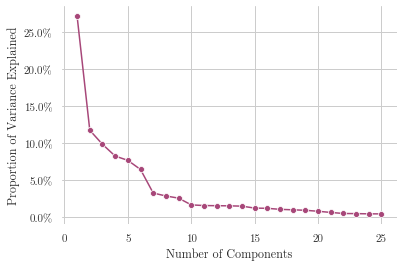

In [58]:
# Create scree plot to determine the optimal number of principal components
ax = sns.lineplot(y=pca.explained_variance_ratio_ * 100, x=range(1, 26),
                  marker='o', color="#a74779")
ax.set(title = "",
       ylabel = "Proportion of Variance Explained", xlabel = "Number of Components")
sns.set(font="CMU Serif", style="whitegrid")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("scree.png", dpi=1200, bbox_inches="tight") 

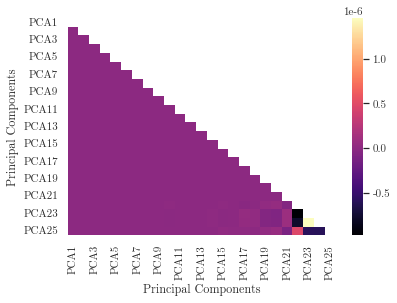

In [56]:
# Plot correlation matrix
mask = np.triu(np.ones_like(X_train_clean_pca.corr()))
ax = sns.heatmap(X_train_clean_pca.corr(), mask=mask, cmap="magma")
ax.set(title = "",
       ylabel = "Principal Components", xlabel = "Principal Components")
sns.set(font="CMU Serif", style="whitegrid")
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("correlation2.png", dpi=800, bbox_inches="tight") 

In [51]:
# Export data
X_train_clean_pca.to_csv("X_train_clean_pca.csv", index=True)